# Importacin y primeros pasos

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #dividir conjuntos de datos en conjuntps de entrenamiento y prueba
from sklearn.datasets import load_iris #conjunto de datos Iris, que es un recurso común en el aprendizaje automático, especialmente para clasificación

#cargar el conjunto de datos 
data = load_iris()
X = data.data #asignacion de caracteristicas (features) longitud y ancho del sepalo y del petalo
y = data.target #asignacion de etiquetas (targets) especies 

#dividir el conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state, obtendrás la misma división de datos.


## Preprocesamiento de datos

In [67]:
#escalado de caracteristicas
from sklearn.preprocessing import StandardScaler #normaliza los datos ajustándolos a una distribución con media cero y desviación estándar uno

scaler = StandardScaler() #ajusta (aprender) los parámetros de las características de los datos de entrenamiento y luego transformar estos datos, así como los datos de prueba

#ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train) #fit(): Calcula la media y la desviación estándar Aplica la transformación a los datos, restando la media y dividiendo por la desviación estándar, para que cada característica tenga media 0 y desviación estándar 1.

#transformar los datos de prueba
X_test_scaled = scaler.transform(X_test) #transform() directamente, sin llamar a fit(). Esto es importante porque queremos aplicar la misma transformación que se usó para escalar X_train a los datos de prueba X_test. Utilizamos los parámetros aprendidos (media y desviación estándar) del conjunto de entrenamiento para transformar el conjunto de prueba, de modo que la misma escala se aplique de manera consistente


In [68]:
#codificacion de variables categoricas
from sklearn.preprocessing import OneHotEncoder # convierte variables categóricas (variables que tienen un número limitado de valores distintos) en una representación numérica adecuada para modelos de aprendizaje automático.

# Ejemplo con variables categóricas
categories = np.array(['red', 'green', 'blue', 'red', 'blue'])

encoder = OneHotEncoder(sparse_output=False) #sparse_output=False: Indica que queremos que el resultado sea un array denso (una matriz de NumPy)

# Ajustar y transformar los datos categóricos
encoded_categories = encoder.fit_transform(categories.reshape(-1, 1))
print(encoded_categories)

#toma un conjunto de categorías y las convierte en una representación numérica binaria adecuada para ser utilizada en modelos de aprendizaje automático.

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


## Modelos de clasificacion 

In [69]:
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#crear el modelo KNM
knn = KNeighborsClassifier(n_neighbors=3)

#entrenar el modelo
knn.fit(X_train_scaled, y_train)

#realizar predicciones
y_pred = knn.predict(X_test_scaled)

#evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [70]:
#support vector machine (SVM)
from sklearn.svm import SVC

#crear modelo SVM
svm = SVC(kernel='linear')

#entrenar el modelo 
svm.fit(X_train_scaled, y_train)

#realizar predicciones
y_pred = svm.predict(X_test_scaled)

#evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy}')

Accuracy : 0.9666666666666667


## Modelos de regresion

In [71]:
#regrecion lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#cargar un cnjunto de datos de ejemplo
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target

#dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#crear el modelo de regrecion lineal
lin_reg = LinearRegression()

#entrenar el modelo
lin_reg.fit(X_train, y_train)

#realizar predicciones
y_pred = lin_reg.predict(X_test)

#evaluar el modelo
mse = mean_absolute_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

Mean squared error: 0.20304725956613057


In [72]:

# regresion de ridge
from sklearn.linear_model import Ridge

#crear modelo de regrecion ridge
ridge_reg = Ridge(alpha=1.0)

#entrenar el modelo
ridge_reg.fit(X_train, y_train)

#realizar predicciones
y_pred = ridge_reg.predict(X_test)

#evaluar el modelo
mse = mean_absolute_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

Mean squared error: 0.20246389302187387


## Modelos de cloustering

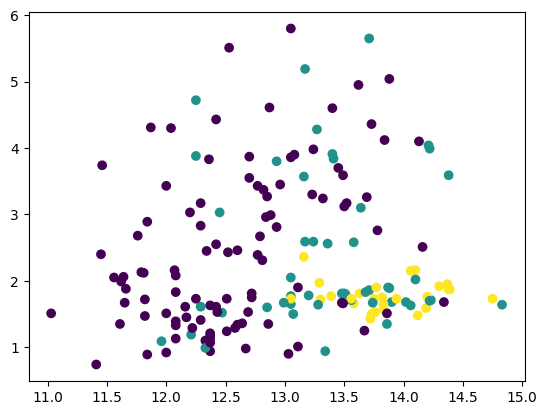

In [73]:
#k-means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#crear el modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)

#ajustar el modelo
kmeans.fit(X)

#predecir los clousters
clusters = kmeans.predict(X)

#visualizar los clousters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.show()


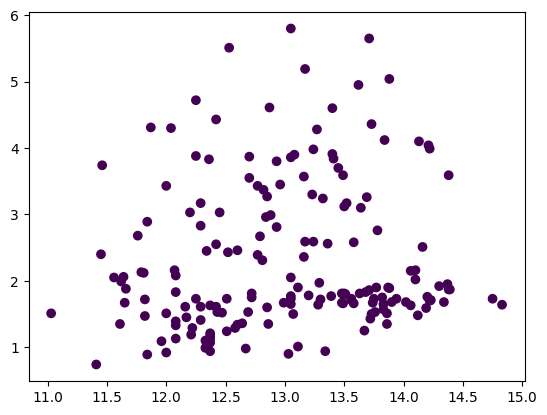

In [74]:
#DBSCAN
from sklearn.cluster import DBSCAN

#crear el modelo
dbscan = DBSCAN(eps=0.5, min_samples=5)

#ajustar el modelo
clusters = dbscan.fit_predict(X)

#visualizar los clusters
plt.scatter(X[:, 0],X[:, 1], c=clusters, cmap='viridis')
plt.show()

## Evaluacion de modelos

In [75]:
#validacion cruzada
from sklearn.model_selection import cross_val_score

#evaluar el modelo con validacion cruzada
scores = cross_val_score(knn, X, y, cv=5)
print(f'Cross-Validation  Scores: {scores}')
print(f'Mean CV Scores: {np.mean(scores)}')


Cross-Validation  Scores: [0.63888889 0.69444444 0.66666667 0.65714286 0.85714286]
Mean CV Scores: 0.7028571428571428


Accuracy: 1.0


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


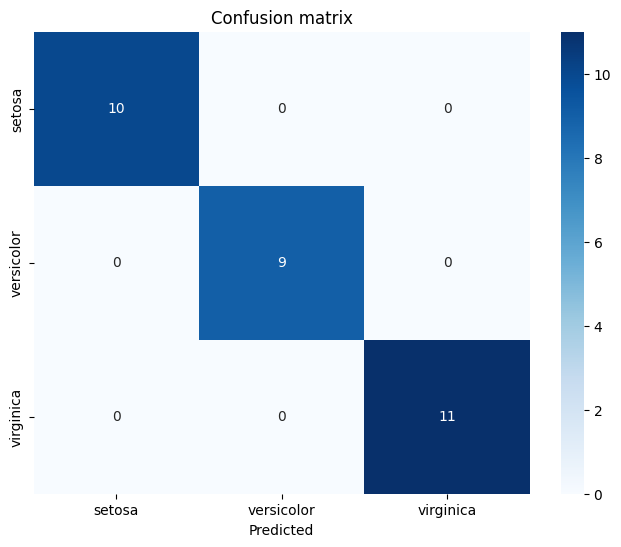

In [80]:
#ejemplo para el uso de matriz de confusion 
import pandas as pd #manipulacion de datos
import numpy as np #operaciones numericas
from sklearn.model_selection import train_test_split #Para dividir los datos en conjuntos de entrenamiento y prueba.
from sklearn.datasets import load_iris #Para cargar el conjunto de datos Iris.
from sklearn.preprocessing import StandardScaler #Para escalar las características.
from sklearn.neighbors import KNeighborsClassifier #Para el modelo de K-Nearest Neighbors.
from sklearn.metrics import accuracy_score, confusion_matrix #Para evaluar el modelo.
import seaborn as sns #Para visualización.
import matplotlib.pyplot as plt #Para visualización.

#cargar el conjunto de datos iris
data=load_iris()
X=data.data #caracteristicas (features)
y=data.target #etiquetas (targets)

#dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#escalar las caracteristicas 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#crear el modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)

#entrenar el modelo
knn.fit(X_train_scaled, y_train)

#realiza predicciones
y_pred = knn.predict(X_test_scaled)

#evaluar el modelo
#calcular la precisin del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\n')

#crear la matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

#visualizar la matriz de cofusion
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.title('Actual')
plt.title('Confusion matrix')
plt.show()